按计划这一节是讲线性回归的变分推断，但由于变分分布其实是拟合的后验概率分布，所以这一节先讲线性回归模型的贝叶斯估计，首先线性回归模型大家应该都比较熟悉了，该项目最初便是从线性回归开始的：[《01_线性模型_线性回归》](https://nbviewer.jupyter.org/github/zhulei227/ML_Notes/blob/master/notebooks/01_%E7%BA%BF%E6%80%A7%E6%A8%A1%E5%9E%8B_%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb)以及[《01_线性模型_线性回归_正则化(Lasso,Ridge,ElasticNet)》](https://nbviewer.jupyter.org/github/zhulei227/ML_Notes/blob/master/notebooks/01_%E7%BA%BF%E6%80%A7%E6%A8%A1%E5%9E%8B_%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92_%E6%AD%A3%E5%88%99%E5%8C%96(Lasso%2CRidge%2CElasticNet)，之前提及的线性回归模型都是如下形式的：   

$$
y(x,w)=w_0+w_1x_1+\cdots+w_Dx_D
$$

其中，$w=[w_0,w_1,...,w_D]$为模型参数，$x=[x_1,x_2,...,x_D]$为输入变量，但这样的形式具有很大的局限性，难以拟合复杂的情况，所以我们通常会通过“特征工程”的方式对输入变量做一定的扩展变换，这样我们就有了更加一般的线性回归模型，它被称为线性基函数模型

### 一.线性基函数模型
它的形式如下   

$$
y(x,w)=w_0+\sum_{j=1}^{M-1}w_j\phi_j(x)
$$
这里，$\phi_j(\cdot)$表示“特征工程”函数，即基函数，而参数为$w=[w_0,w_1,...,w_{M-1}]$，共有$M$个。显然，我们之前讨论的线性回归模型是$\phi(x)=x$的特殊情况，可以发现，线性基函数模型具有这样的性质：它关于参数是线性的，关于输入变量是非线性的。为了书写方便，我们会假设$\phi_0(x)=1$，这样模型方程就可以简便的书写为：   

$$
y(x,w)=w^T\phi(x)
$$  

$\phi_j(\cdot)$除了我们自定义一些复杂的函数外，还有一些常用的基函数，比如

#### 多项式基函数

$$
\phi_j(x)=x^j
$$  

#### 高斯基函数

$$
\phi_j(x)=exp\left \{-\frac{(x-\mu_j)^2}{2s^2}\right \}
$$  

其中，$\mu_j$控制了基函数在输入空间中的位置，超参数$s$控制了基函数在空间中的辐射范围  

#### sigmoid基函数

$$
\phi_j(x)=\sigma\left( \frac{x-\mu_j}{s}\right )
$$  

这里，$\sigma(\cdot)$表示sigmoid函数

### 二.最小平方和误差与高斯极大似然估计
上面对“线性”做了扩展，接下来我们从概率的角度去理解一下之前所用的最小平方和误差，我们假设目标变量$t$由确定的函数$y(x,w)$给出，同时这个函数被附加了一个高斯噪声$\epsilon$，即：   

$$
t=y(w,x)+\epsilon
$$  
其中$\epsilon$是一个零均值的高斯随机变量，且精度（方差的倒数）为$\beta$，因此我们有：   

$$
p(t\mid x,w,\beta)=N(t\mid y(x,w),\beta^{-1})
$$  

显然，对于给定的$x$，该分布的最优预测为目标变量的条件均值：   

$$
E[t\mid x]=\int tp(t\mid)dt=y(x,w)
$$  

对于观测值$X=\{x_1,x_2,...,x_N\},t=\{t_1,t_2,...,t_N\}$，我们可以写出其似然函数：   

$$
p(t\mid X,w,\beta)=\prod_{n=1}^N N(t_n\mid w^T\phi(x_n),\beta^{-1})
$$  

那么，其对数似然函数为（为了记号的简洁，省略$X$）：   

$$
ln\ p(t\mid w,\beta)=\sum_{n=1}^Nln\ N(t_n\mid w^T\phi(x_n),\beta^{-1})\\
=\frac{N}{2}ln\ \beta-\frac{N}{2}ln(2\pi)-\beta E_D(w)
$$  

这里，$E_D(w)$即是平方和误差函数：   

$$
E_D(w)=\frac{1}{2}\sum_{n=1}^N(t_n-w^T\phi(x_n))^2
$$  

接下来就可以用极大似然估计的方式求$w,\beta$了，由于$\beta>0$，我们可以先关于$w$求最大值，而对对数似然函数求最大，等价于对$E_D(w)$求最小，所以可以得到极大似然估计最优解：   

$$
w_{ML}=(\Phi^T\Phi)^{-1}\Phi^Tt
$$  

这里$\Phi$即是$X$通过基函数映射后的$N\times M$大小的矩阵：   

$$
\Phi=\begin{pmatrix}
\phi_0(x_1) &\phi_1(x_1)  & \cdots &\phi_{M-1}(x_1) \\ 
\phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_2)\\ 
\vdots & \vdots &\ddots  &\vdots \\ 
\phi_0(x_N) &\phi_1(x_N)  & \cdots & \phi_{M-1}(x_N)
\end{pmatrix}
$$  
从上面的推导，可以发现，我们常用的最小均分误差函数从概率的角度来看就是引入了高斯噪声的极大似然估计，接下来再深刻的认识一下偏置参数$w_0$
#### $w_0$的最优解
我们将$E_D(w)$中间项拆开   

$$
E_D(w)=\frac{1}{2}\sum_{n=1}^N(t_n-w_0-\sum_{j=1}^{M-1}w_j\phi_j(x_n))^2
$$  

对$w_0$求导并令其为0，可以解出：   

$$
w_0=\bar{t}-\sum_{j=1}^{M-1}w_j\bar{\phi_j}
$$  

这里：   

$$
\bar{t}=\frac{1}{N}\sum_{n=1}^Nt_n,\bar{\phi_j}=\frac{1}{N}\sum_{n=1}^N\phi_j(x_n)
$$  

可以发现，偏置$w_0$补偿了目标值的平均值与基函数的值的平均值的加权求和之间的差  

#### $\beta$的最优解
显然，$\beta$的最优解也可以写出来

$$
\frac{1}{\beta_{ML}}=\frac{2}{N}E_D(w_{ML})
$$

### 三.$L_2$正则化与最大后验估计

接下来，我们看看后验概率$p(t\mid w)$（为了简洁，$X$没有写出来），现阶段我们先将噪声精度$\beta$看做已知常数，由于似然函数$p(t\mid w)$是$w$的二次函数的指数形式，所以对应的共轭先验是高斯分布，我们假设参数$w$的先验为：   

$$
p(w)=N(w\mid m_0,S_0)
$$  

这里，均值为$m_0$，协方差为$S_0$，所以：   

$$
p(w\mid t)\propto p(w)p(t\mid w)
$$  

所以后验分布也会是高斯分布（共轭先验选择了高斯分布的缘故），通过配方，我们可以直接得到后验分布的形式：   

$$
p(w\mid t)=N(w\mid m_N,S_N)
$$  

这里：   

$$
m_N=S_N(S_0^{-1}m_0+\beta\Phi^Tt)\\
S_N^{-1}=S_0^{-1}+\beta\Phi^T\Phi
$$  

为了简化，我们可以假设先验分布中的超参数$m_0=0,S_0=\alpha^{-1}I$，这里$I$是单位矩阵，这时

$$
m_N=\beta S_N\Phi^Tt\\
S_N^{-1}=\alpha I+\beta\Phi^T\Phi
$$  
进一步地，对后验概率取对数，我们可以得到：   

$$
ln\ p(w\mid t)=-\frac{\beta}{2}\sum_{n=1}^N\left\{ t_n-w^T\phi(x_n) \right\}^2-\frac{\alpha}{2}w^Tw+const
$$  

我们可以发现，在这种情况下，如果对后验概率极大化就等价于我们常用到的平方和损失函数+$L_2$正则化项的极小化

### 四.贝叶斯估计
上面对后验概率做了推导，那么我们就可以进入本节的重点了，即对于新的输入$\hat{x}$如果通过贝叶斯估计求得它的预测$\hat{t}$，根据定义，我们知道：   

$$
p(\hat{t}\mid \hat{x},X,t,\alpha,\beta)=\int p(\hat{t}\mid w,\beta,\hat{x})p(w\mid X,t,\alpha,\beta)dw
$$  

这里，$p(w\mid X,t,\alpha,\beta)$即是我们上面推导出来的后验概率：   

$$
p(w\mid X,t,\alpha,\beta)=N(w\mid m_N,S_N)
$$  

而$p(\hat{t}\mid w,\beta,\hat{x})$即是我们最初带高斯噪声假设的分布：   

$$
p(\hat{t}\mid \hat{x},w,\beta)=N(\hat{t}\mid y(\hat{x},w),\beta^{-1})\\
=N(\hat{t}\mid w^T\Phi(\hat{x}),\beta^{-1})
$$  

经过化简，我们可以得到：   

$$
p(\hat{t}\mid \hat{x},X,t,\alpha,\beta)=N(\hat{t}\mid m_N^T\phi(\hat{x}),\sigma_N^2(\hat{x})))
$$  

这里，$m_N$的定义与后验概率分布一样，方差$\sigma_N^2(\hat{x})$为：   
$$
\sigma_N^2(\hat{x})=\frac{1}{\beta}+\phi(\hat{x})^TS_N\phi(\hat{x})
$$  

可以发现，预测数据的方差由噪声项$\frac{1}{\beta}$和输入数据$\hat{x}$相关，当然这一部分其实并不会影响到我们的预测结果，我们的预测结果为均值项：   
$$
\hat{y}(w,\hat{x})=m_N^T\phi(\hat{x})
$$  

所以：   

$$
w=m_N
$$  

细心的同学已经发现了，这里贝叶斯估计的结果与极大后验估计的结果是一样的，这是由于共轭先验也是选择的高斯分布造成的，将先验分布换着其他分布就不一定了

### 五.代码实现
这里本质上就是实现一个Ridge回归...

In [1]:
%matplotlib inline

In [2]:
"""
线性回归的bayes估计
"""
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression(object):
    def __init__(self, basis_func=None, alpha=1, beta=1):
        """
        :param basis_func: list,基函数列表，包括rbf,sigmoid,poly_{num},linear，默认None为linear，其中poly_{num}中的{num}表示多项式的最高阶数
        :param alpha: alpha/beta表示理解为L2正则化项的大小，默认为1
        :param beta: 噪声，默认为1
        """
        if basis_func is None:
            self.basis_func = ['linear']
        else:
            self.basis_func = basis_func
        self.alpha = alpha
        self.beta = beta
        # 特征均值、标准差
        self.feature_mean = None
        self.feature_std = None
        # 训练参数
        self.w = None

    def _map_basis(self, X):
        """
        将X进行基函数映射
        :param X:
        :return:
        """
        x_list = []
        for basis_func in self.basis_func:
            if basis_func == "linear":
                x_list.append(X)
            elif basis_func == "rbf":
                x_list.append(np.exp(-0.5 * X * X))
            elif basis_func == "sigmoid":
                x_list.append(1 / (1 + np.exp(-1 * X)))
            elif basis_func.startswith("poly"):
                p = int(basis_func.split("_")[1])
                for pow in range(1, p + 1):
                    x_list.append(np.power(X, pow))
        return np.concatenate(x_list, axis=1)

    def fit(self, X, y):
        self.feature_mean = np.mean(X, axis=0)
        self.feature_std = np.std(X, axis=0) + 1e-8
        X_ = (X - self.feature_mean) / self.feature_std
        X_ = self._map_basis(X_)
        X_ = np.c_[np.ones(X_.shape[0]), X_]
        self.w = self.beta * (
            np.linalg.inv(self.alpha * np.eye(X_.shape[1]) + self.beta * X_.T @ X_)) @ X_.T @ y.reshape((-1, 1))

    def predict(self, X):
        X_ = (X - self.feature_mean) / self.feature_std
        X_ = self._map_basis(X_)
        X_ = np.c_[np.ones(X_.shape[0]), X_]
        return (self.w.T @ X_.T).reshape(-1)

    def plot_fit_boundary(self, x, y):
        """
        绘制拟合结果
        :param x:
        :param y:
        :return:
        """
        plt.scatter(x[:, 0], y)
        plt.plot(x[:, 0], self.predict(x), 'r')

### 测试

In [3]:
#造伪样本
X=np.linspace(0,100,100)
X=np.c_[X,np.ones(100)]
w=np.asarray([3,2])
Y=X.dot(w)
X=X.astype('float')
Y=Y.astype('float')
X[:,0]+=np.random.normal(size=(X[:,0].shape))*3#添加噪声
Y=Y.reshape(100,1)

In [4]:
#加噪声
X=np.concatenate([X,np.asanyarray([[100,1],[101,1],[102,1],[103,1],[104,1]])])
Y=np.concatenate([Y,np.asanyarray([[3000],[3300],[3600],[3800],[3900]])])

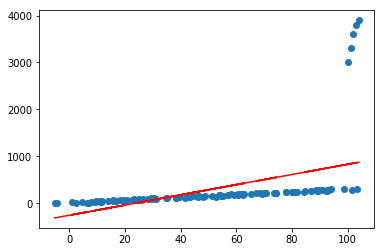

In [5]:
lr=LinearRegression()
lr.fit(X[:,:-1],Y)
lr.plot_fit_boundary(X[:,:-1],Y)

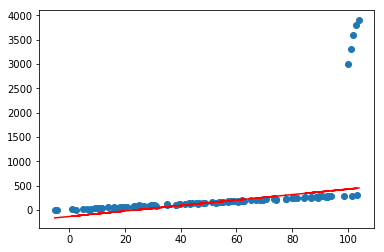

In [6]:
#增加alpha防止过拟合
lr=LinearRegression(alpha=100)
lr.fit(X[:,:-1],Y)
lr.plot_fit_boundary(X[:,:-1],Y)

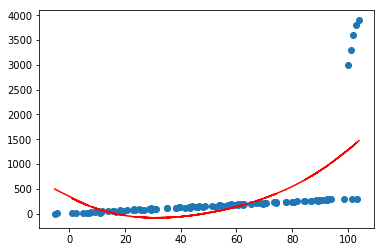

In [7]:
#换不同的基函数组合
lr=LinearRegression(basis_func=['poly_2','rbf'])
lr.fit(X[:,:-1],Y)
lr.plot_fit_boundary(X[:,:-1],Y)

这里，两个超参数`alpha`和`beta`都需要人工去调试，非常不便，下一节将继续介绍PRML第三章的内容：**证据近似**，它将超参数`alpha`和`beta`的分布也扔到贝叶斯框架中，让训练数据自己去选择合适的`alpha`和`beta`